## Data Overview & Preprocessing Dataset: Tesla Stock Data

## Source: Investing.com

Date Range: January 2, 2020 – February 4, 2025

### Features Used:

- Price: Closing stock price
- Open, High, Low: Daily price fluctuations
- Vol.: Trading volume (converted from K/M to numerical values)
- Change %: Percentage change in price (converted to float)

### Data Preprocessing Steps:

- Converted 'Date' to datetime format
- Cleaned 'Vol.' and 'Change %' columns
- Ensured no missing values
- Created lag features for forecastin



## Exploratory Data Analysis(EDA)

In [ ]:
import pandas as pd

df = pd.read_csv('Tesla Stock Price History.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/17/2025,426.50,421.50,439.74,419.75,94.99M,3.06%
1,01/16/2025,413.82,423.49,424.00,409.13,68.34M,-3.36%
2,01/15/2025,428.22,409.90,429.80,405.66,81.38M,8.04%
3,01/14/2025,396.36,414.34,422.64,394.54,84.57M,-1.72%
4,01/13/2025,403.31,383.21,403.79,380.07,67.58M,2.17%


In [ ]:
df.dropna(inplace=True)

In [ ]:
cols_to_convert = ['Price', 'Open', 'High', 'Low']
df[cols_to_convert] = df[cols_to_convert].replace(',', '', regex=True).astype(float)

In [ ]:
df['Vol.'] = df['Vol.'].replace({'M': '*1e6'}, regex=True).map(pd.eval).astype(float)

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/17/2025,426.50,421.50,439.74,419.75,94990000.0,3.06%
1,01/16/2025,413.82,423.49,424.00,409.13,68340000.0,-3.36%
2,01/15/2025,428.22,409.90,429.80,405.66,81380000.0,8.04%
3,01/14/2025,396.36,414.34,422.64,394.54,84570000.0,-1.72%
4,01/13/2025,403.31,383.21,403.79,380.07,67580000.0,2.17%


In [ ]:
df['Change %'] = df['Change %'].str.replace('%', '', regex=False).astype(float)

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/17/2025,426.50,421.50,439.74,419.75,94990000.0,3.06
1,01/16/2025,413.82,423.49,424.00,409.13,68340000.0,-3.36
2,01/15/2025,428.22,409.90,429.80,405.66,81380000.0,8.04
3,01/14/2025,396.36,414.34,422.64,394.54,84570000.0,-1.72
4,01/13/2025,403.31,383.21,403.79,380.07,67580000.0,2.17


In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [ ]:
print("Dataset Information:")
print(df.info())

print("\nBasic Statistics Summary:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1509 non-null   object 
 1   Price     1509 non-null   float64
 2   Open      1509 non-null   float64
 3   High      1509 non-null   float64
 4   Low       1509 non-null   float64
 5   Vol.      1509 non-null   float64
 6   Change %  1509 non-null   float64
dtypes: float64(6), object(1)
memory usage: 82.7+ KB
None

Basic Statistics Summary:
             Price         Open         High          Low          Vol.  \
count  1509.000000  1509.000000  1509.000000  1509.000000  1.509000e+03   
mean    183.749284   183.777860   187.914135   179.381140  1.275613e+08   
std     106.168199   106.274252   108.657604   103.615095  8.060468e+07   
min      11.930000    12.070000    12.450000    11.800000  2.940000e+07   
25%      99.000000    98.000000   100.880000    94.730000  7.8

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1400x600 with 0 Axes>

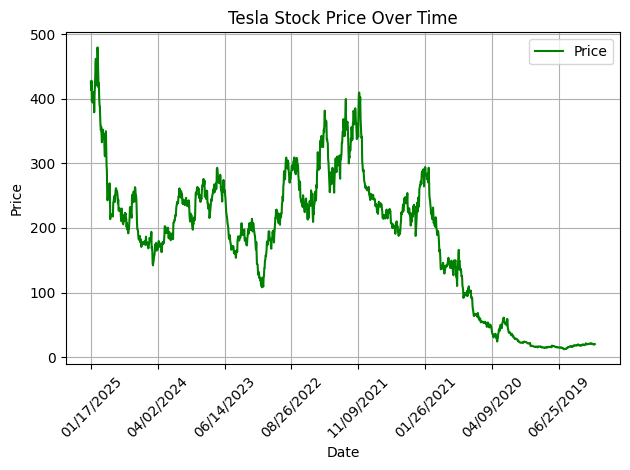

In [ ]:
plt.figure(figsize=(14, 6))
df.plot(x='Date', y='Price', title='Tesla Stock Price Over Time', xlabel='Date', ylabel='Price', color='green')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

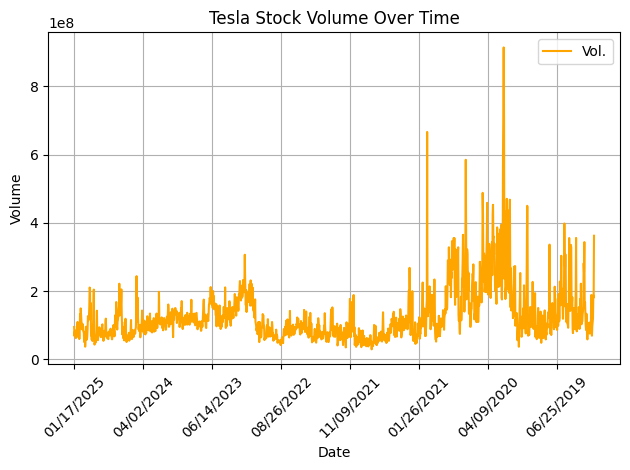

In [ ]:
# Time series plot of volume over time
plt.figure(figsize=(14, 6))
df.plot(x='Date', y='Vol.', title='Tesla Stock Volume Over Time', xlabel='Date', ylabel='Volume', color='orange')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

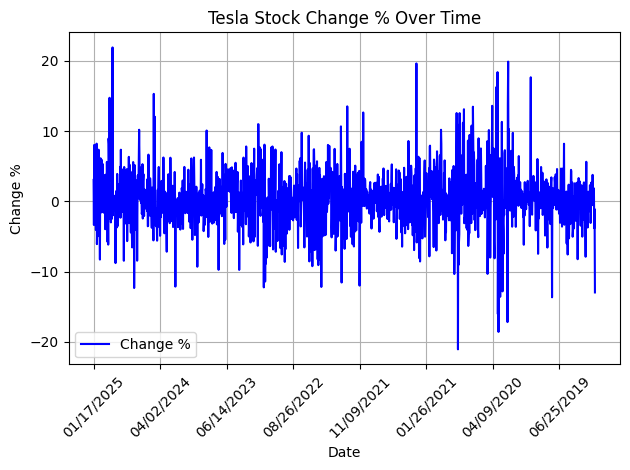

In [ ]:
# Plot the change percentage over time
plt.figure(figsize=(14, 6))
df.plot(x='Date', y='Change %', title='Tesla Stock Change % Over Time', xlabel='Date', ylabel='Change %', color='blue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

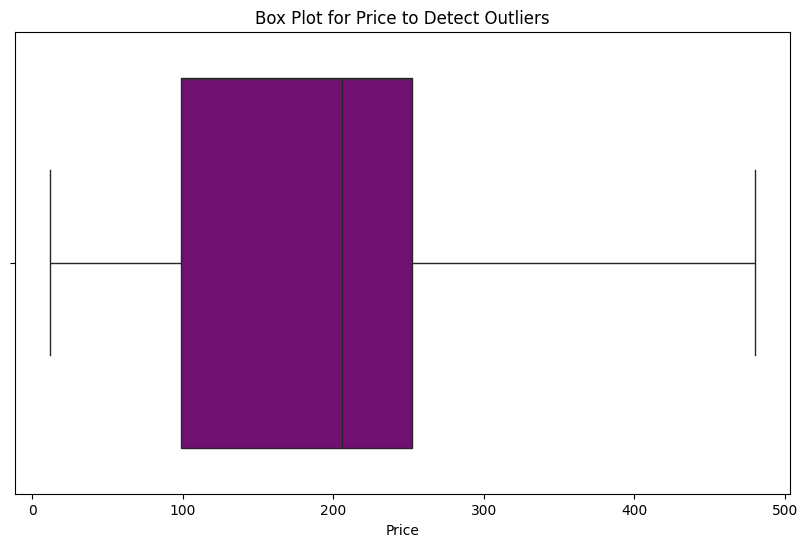

In [ ]:
# Box plot for detecting outliers in 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'], color='purple')
plt.title('Box Plot for Price to Detect Outliers')
plt.show()

In [ ]:
df['Price Change %'] = df['Price'].pct_change() * 100

threshold = 5

sudden_changes = df[df['Price Change %'].abs() >= threshold]

print("Days with sudden price changes:")
print(sudden_changes[['Date', 'Price', 'Price Change %']])

Days with sudden price changes:
            Date   Price  Price Change %
3     01/14/2025  396.36       -7.440101
10    01/02/2025  379.28       -7.591853
11    12/31/2024  403.84        6.475427
14    12/26/2024  454.13        5.205486
16    12/23/2024  430.60       -6.852990
...          ...     ...             ...
1442  04/25/2019   16.51        5.293367
1457  04/03/2019   19.45        8.963585
1471  03/14/2019   19.33        5.283224
1481  02/28/2019   21.33        8.549618
1483  02/26/2019   19.86       -5.338418

[251 rows x 3 columns]


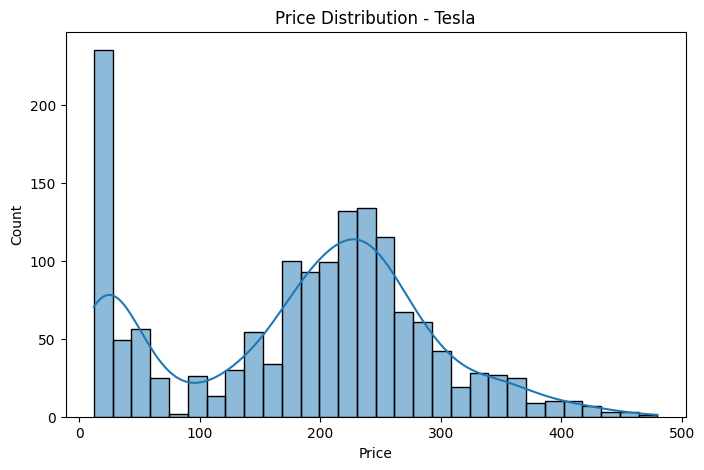

In [ ]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Price Distribution - Tesla")
plt.show()

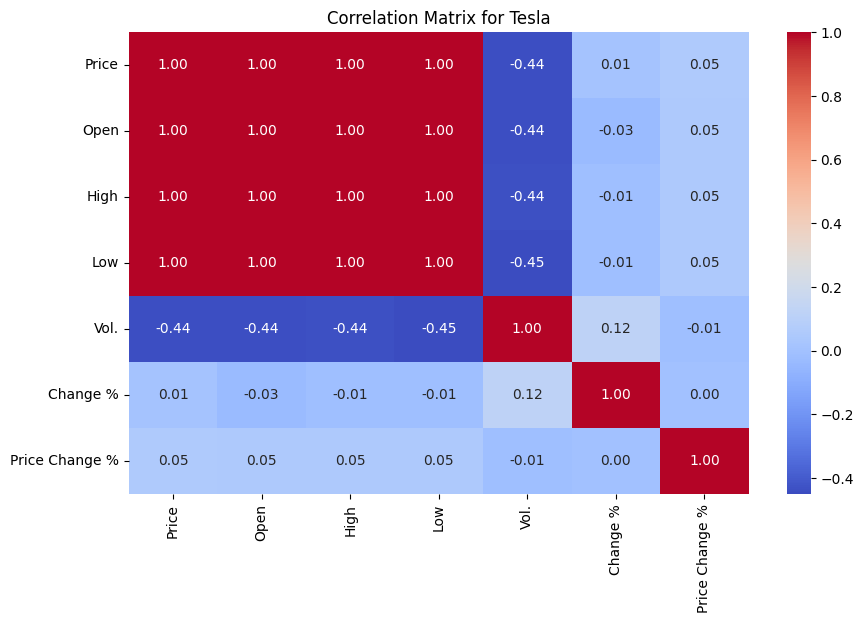

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Tesla")
plt.show()

 The correlation matrix helps identify relationships between numerical variables in the dataset.
 We first converted the 'Date' column to datetime format to ensure it's not included in calculations.

 Then, we selected only numerical columns (Price, Open, High, Low, Volume, Change %) for correlation analysis.
 The correlation values range from -1 to 1:
    
- Positive values indicate a direct relationship (as one variable increases, the other also increases).
  
    
- Negative values indicate an inverse relationship (as one increases, the other decreases).
  
- Values close to 0 suggest no significant relationship.

This analysis helps in feature selection for predictive modeling, as highly correlated variables might be redundant.








In [ ]:
df['7-day MA'] = df['Price'].rolling(window=7).mean()
df['30-day Volatility'] = df['Price'].rolling(window=30).std()

## Feature Engineering

- Used in time series forecasting models (e.g., ARIMA, LSTM).
- Helps smooth short-term fluctuations in stock price analysis.
- Can be used as a feature in regression models to predict future stock prices.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['Open', 'High', 'Low', 'Price', 'Vol.']
scaled_data = StandardScaler().fit_transform(df[features])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.84789136 0.15150115]


The Explained Variance Ratio tells us how much of the original data’s "spread" or variation is captured by each new component (or factor) after performing PCA (Principal Component Analysis). In this case, the first component explains 84.8% of the data's variation, and the second one explains 15.2%. This helps us understand how well the new components represent the data, and how much information is preserved when we reduce the number of features.

In [ ]:
# Ensure Date is sorted
df = df.sort_values('Date')

# Set Date as index
df.set_index('Date', inplace=True)

# Use only the 'Price' column for forecasting
price_series = df['Price']

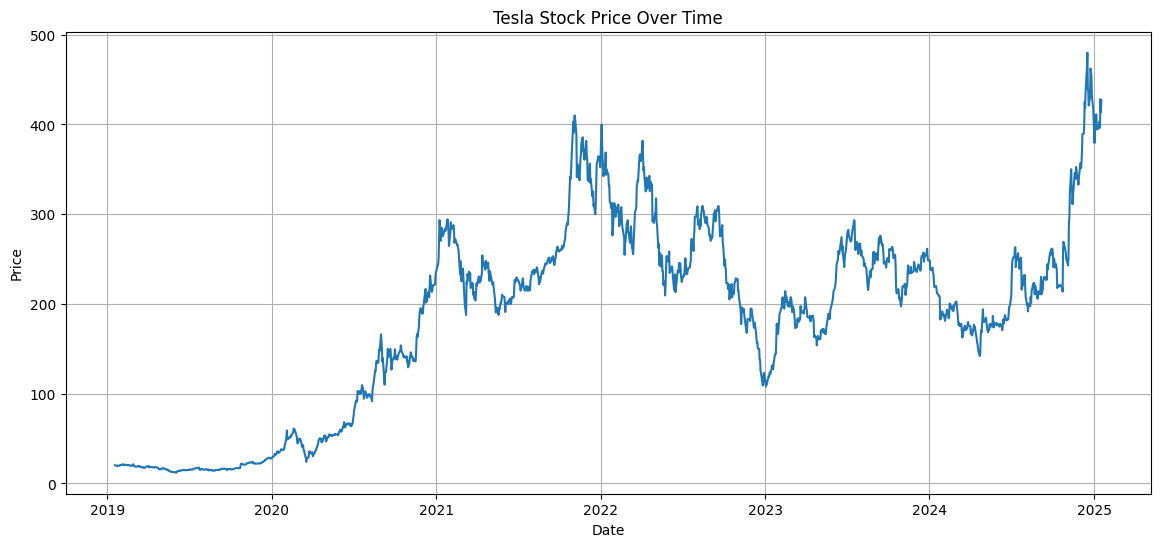

ADF Statistic: -1.2419132030451787
p-value: 0.6553109855182264
The series is not stationary. Differencing may be needed.


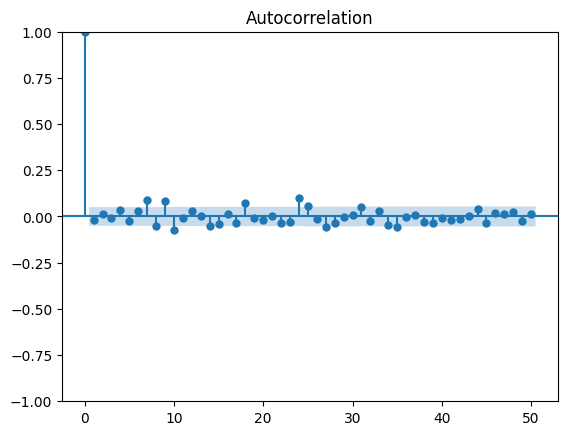

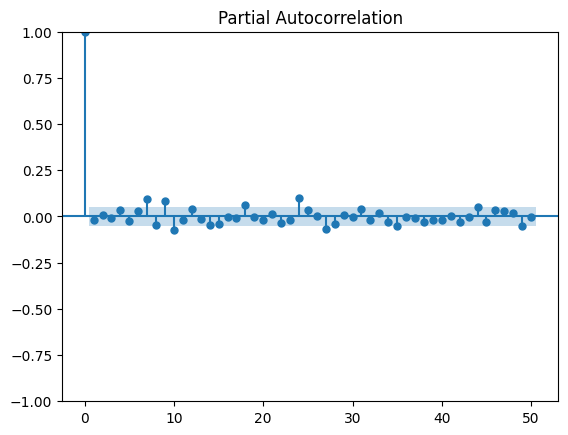

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1509
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5314.876
Date:                Wed, 14 May 2025   AIC                          10635.752
Time:                        20:24:14   BIC                          10651.707
Sample:                             0   HQIC                         10641.694
                               - 1509                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5788      0.509     -1.136      0.256      -1.577       0.420
ma.L1          0.5563      0.520      1.070      0.285      -0.463       1.575
sigma2        67.4205      1.314     51.314      0.0

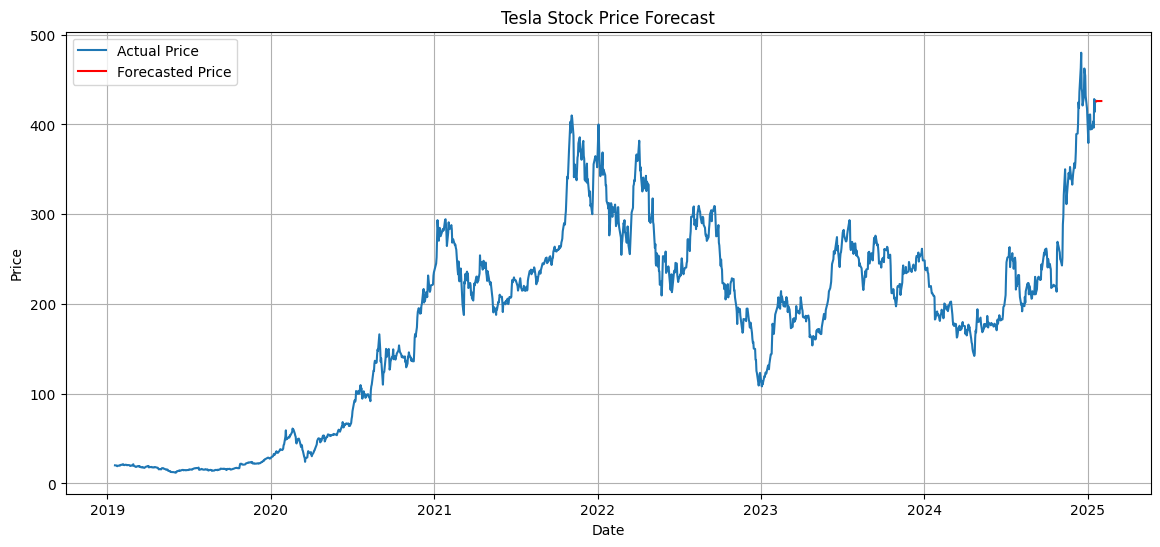

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

plt.figure(figsize=(14, 6))
plt.plot(df['Price'])
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary. Differencing may be needed.")

adf_test(df['Price'])


df['Price_diff'] = df['Price'].diff().dropna()


plot_acf(df['Price_diff'].dropna(), lags=50)
plot_pacf(df['Price_diff'].dropna(), lags=50)
plt.show()

model = ARIMA(df['Price'], order=(1, 1, 1))  # p=1, d=1, q=1
model_fit = model.fit()

print(model_fit.summary())


forecast = model_fit.forecast(steps=10)
forecast_index = pd.date_range(start=df.index[-1], periods=11, freq='B')[1:]


plt.figure(figsize=(14, 6))
plt.plot(df['Price'], label='Actual Price')
plt.plot(forecast_index, forecast, color='red', label='Forecasted Price')
plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("Tesla Stock Price History.csv")
df.columns = df.columns.str.strip()
print(df.columns)
print(df['Date'].head())

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
0    01/17/2025
1    01/16/2025
2    01/15/2025
3    01/14/2025
4    01/13/2025
Name: Date, dtype: object


In [ ]:
print(df.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [ ]:
train = df['Price'][:-10]
test = df['Price'][-10:]
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

y_true = df['Price'][-10:]
y_pred = forecast.values[:10]
y_true = y_true.values[-len(y_pred):]

# RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse:.2f}")

# MAPE
mape = mean_absolute_percentage_error(y_true, y_pred) * 100
print(f"MAPE: {mape:.2f}%")

RMSE: 22.27
MAPE: 4.79%


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmproe_1fj4/6qfez_ua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmproe_1fj4/iavcirr3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83056', 'data', 'file=/tmp/tmproe_1fj4/6qfez_ua.json', 'init=/tmp/tmproe_1fj4/iavcirr3.json', 'output', 'file=/tmp/tmproe_1fj4/prophet_modelfrqhfscg/prophet_model-20250514202426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:24:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:24:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 69.82
Prophet MAPE: 0.25


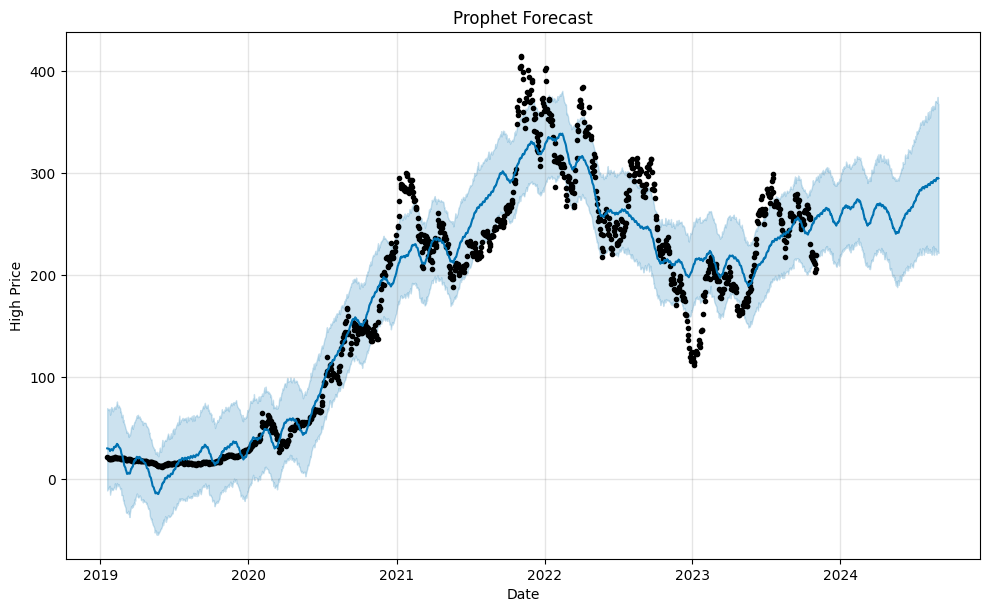

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
df_prophet = df.reset_index().rename(columns={"Date": "ds", "High": "y"})

# Split the data
train_size = int(len(df_prophet) * 0.8)  # Or set a fixed value
train_prophet = df_prophet[:train_size]
test_prophet = df_prophet[train_size:]

# Initialize and fit the model
model_prophet = Prophet()
model_prophet.fit(train_prophet)

# Create a future dataframe that includes test period
future = model_prophet.make_future_dataframe(periods=len(test_prophet), freq='D')

# Make forecast
forecast_prophet = model_prophet.predict(future)

# Extract predictions for the test period
y_true = test_prophet['y'].values
y_pred = forecast_prophet.iloc[train_size:]['yhat'].values

# Calculate metrics
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))
mape_prophet = mean_absolute_percentage_error(y_true, y_pred)

# Print metrics
print(f"Prophet RMSE: {rmse_prophet:.2f}")
print(f"Prophet MAPE: {mape_prophet:.2f}")

# Plot forecast
fig = model_prophet.plot(forecast_prophet)
plt.title("Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("High Price")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
LSTM RMSE: 13.62
LSTM MAPE: 0.04


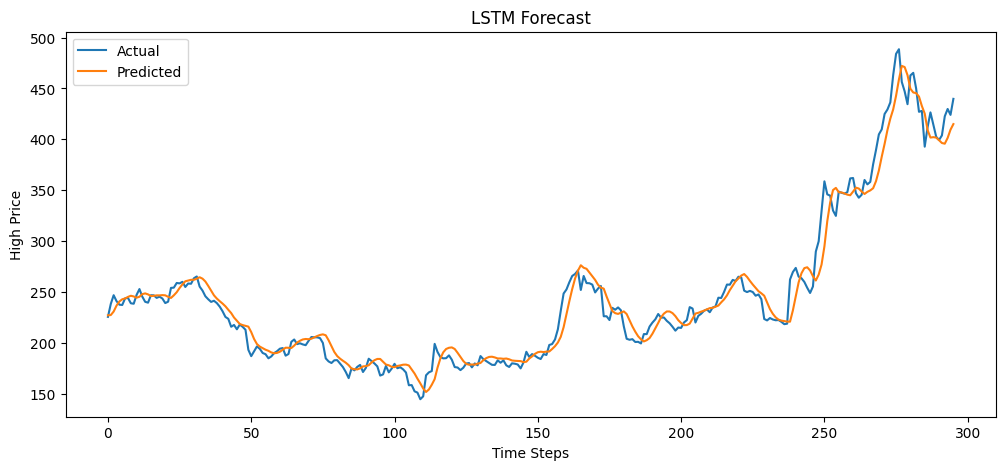

In [ ]:
# Prepare data
data = df[['High']].values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 30
X, y = create_sequences(data_scaled, SEQ_LEN)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(SEQ_LEN, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

# Predict and inverse transform
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
rmse_lstm = np.sqrt(mean_squared_error(y_true, y_pred))
mape_lstm = mean_absolute_percentage_error(y_true, y_pred)

print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"LSTM MAPE: {mape_lstm:.2f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('LSTM Forecast')
plt.xlabel('Time Steps')
plt.ylabel('High Price')
plt.legend()
plt.show()

XGBoost RMSE: 23.99
XGBoost MAPE: 0.04


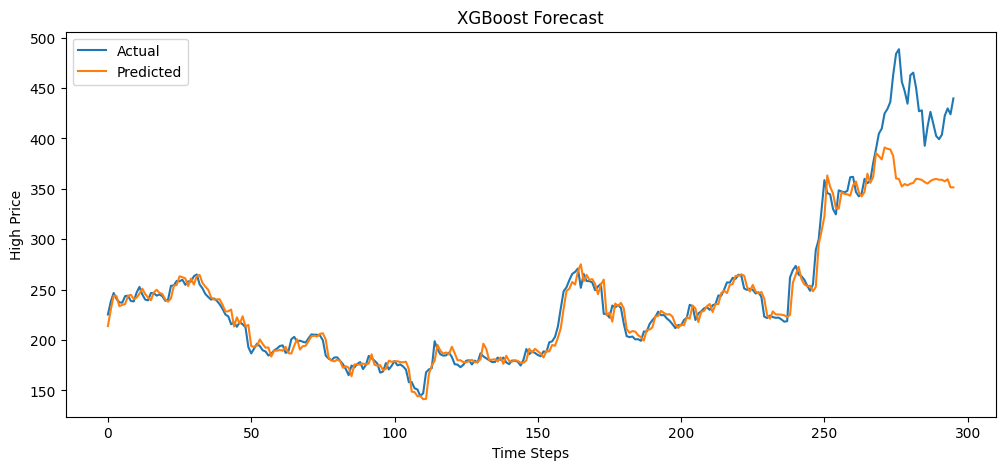

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Prepare data
data = df[['High']].values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 30
X, y = create_sequences(data_scaled, SEQ_LEN)

# Flatten input for XGBoost
X = X.reshape(X.shape[0], X.shape[1])  # shape (samples, features)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train model
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
rmse_xgb = np.sqrt(mean_squared_error(y_true, y_pred))
mape_xgb = mean_absolute_percentage_error(y_true, y_pred)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAPE: {mape_xgb:.2f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('XGBoost Forecast')
plt.xlabel('Time Steps')
plt.ylabel('High Price')
plt.legend()
plt.show()